<a href="https://colab.research.google.com/github/codal-tshah/data-practices/blob/6_apr/pandas/pandas_intermediate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Create plots in pandas**


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

**parse_dates=True, helps to plot the dates properly**

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/data_practices/pandas/data/air_quality_no2.csv",index_col=0, parse_dates=True)
data.head()

,station_antwerp,station_paris,station_london
datetime,,,
2019-05-07 02:00:00,NaN,NaN,23.0
2019-05-07 03:00:00,50.5,25.0,19.0
2019-05-07 04:00:00,45.0,27.7,19.0
2019-05-07 05:00:00,NaN,50.4,16.0
2019-05-07 06:00:00,NaN,61.9,NaN


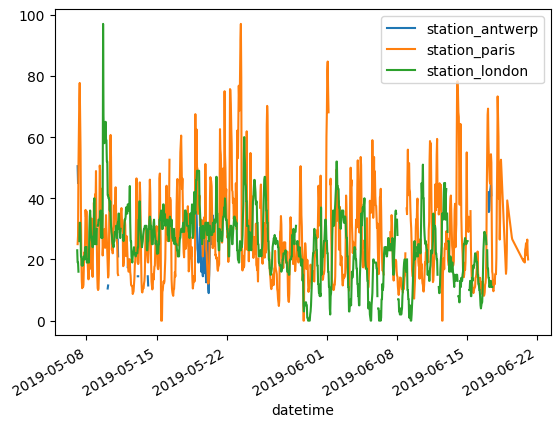

In [ ]:
data.plot()
plt.show()

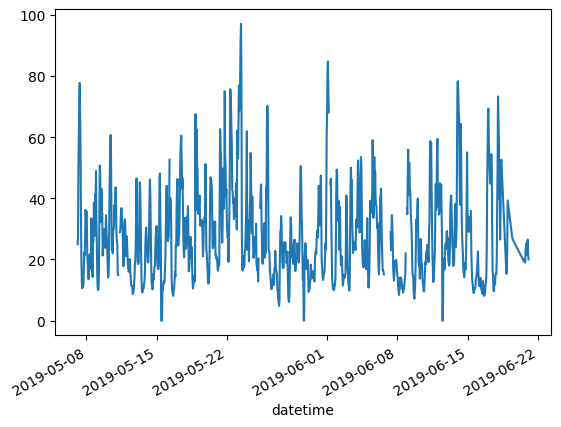

In [ ]:
paris = data["station_paris"].plot()
# plt.show()

**alpha is use for opacity of points in graph** bold text

[]

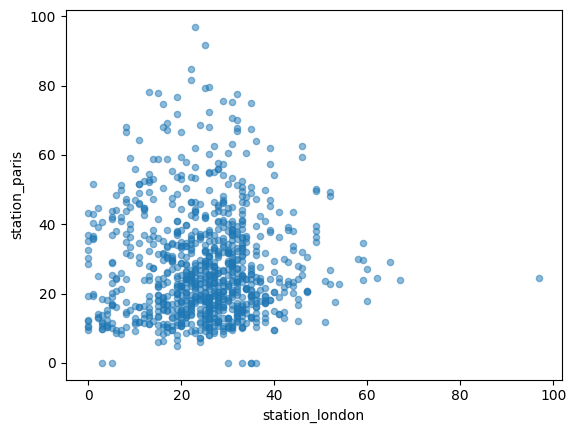

In [ ]:
data.plot.scatter(x="station_london", y="station_paris", alpha=0.5).plot()

<Axes: >

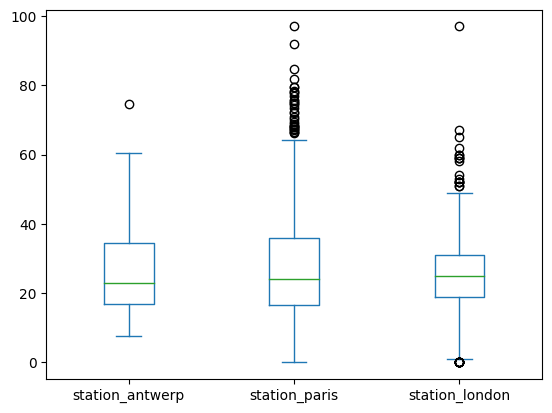

In [ ]:
data.plot.box()

**subplots is use for multiple plots of columns**

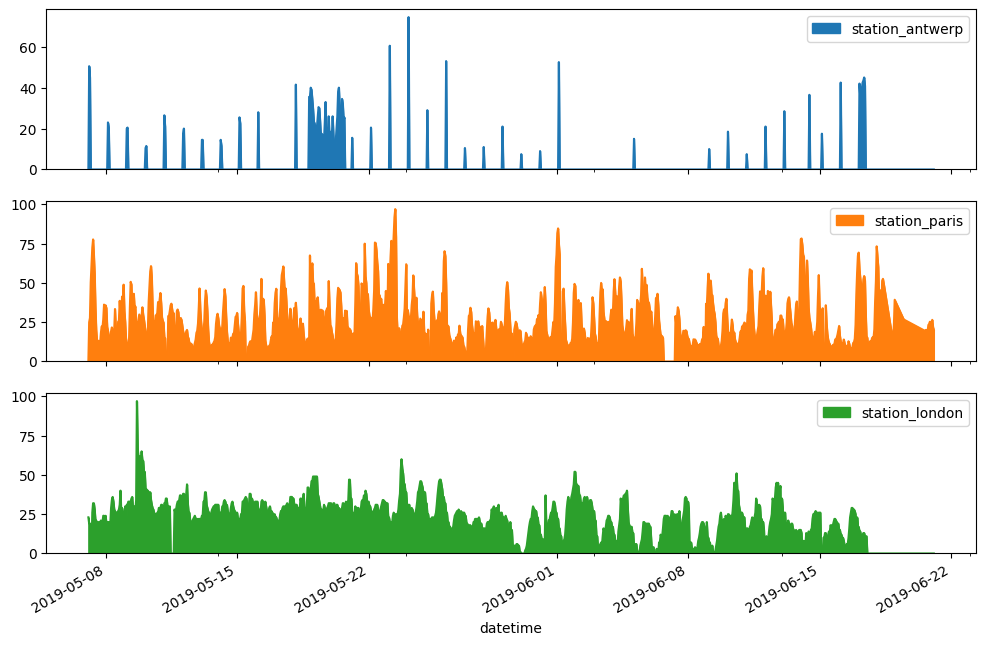

In [ ]:
areas= data.plot.area(figsize=(12,8), subplots=True)
# areas

<Axes: xlabel='datetime'>

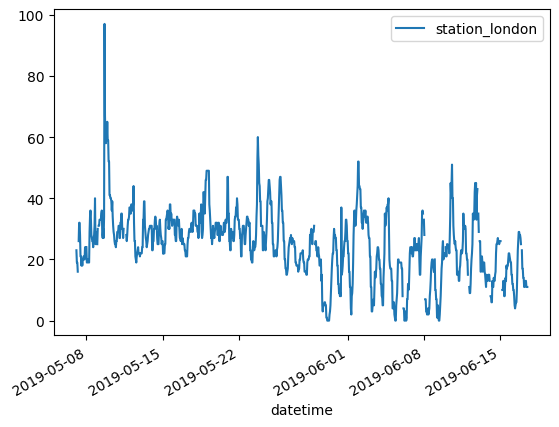

In [ ]:
data.plot.line(y="station_london")

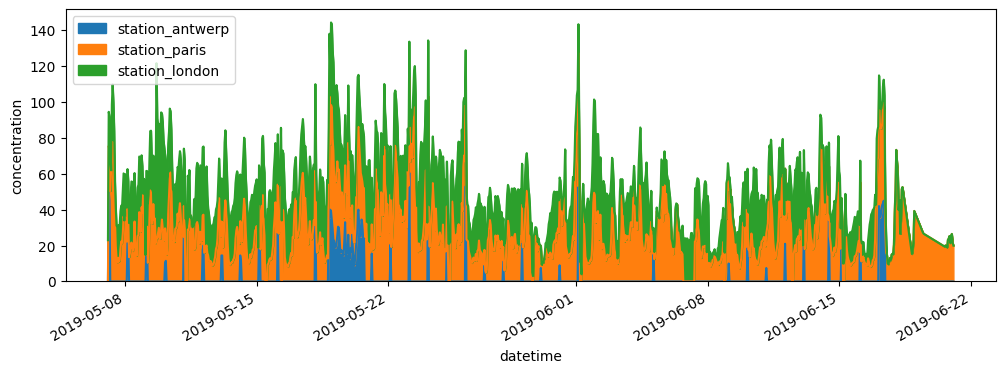

In [ ]:
fig, axs = plt.subplots(figsize=(12, 4))        # Create an empty Matplotlib Figure and Axes
data.plot.area(ax=axs)                   # Use pandas to put the area plot on the prepared Figure/Axes
axs.set_ylabel("concentration")          # Do any Matplotlib customization you like
fig.savefig("concentrations.png")           # Save the Figure/Axes using the existing Matplotlib method.
plt.show()                                      # Display the plot

# **create new columns derived from existing columns**

In [ ]:
data

In [ ]:
data["london_mg_per_cubic"] = data["station_london"] * 1.882
data

,station_antwerp,station_paris,station_london,london_mg_per_cubic
datetime,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286
2019-05-07 03:00:00,50.5,25.0,19.0,35.758
2019-05-07 04:00:00,45.0,27.7,19.0,35.758
2019-05-07 05:00:00,NaN,50.4,16.0,30.112
2019-05-07 06:00:00,NaN,61.9,NaN,NaN
...,...,...,...,...
2019-06-20 22:00:00,NaN,21.4,NaN,NaN
2019-06-20 23:00:00,NaN,24.9,NaN,NaN
2019-06-21 00:00:00,NaN,26.5,NaN,NaN


**Ratio Paris versus Antwerp**

In [ ]:
data["Paris_ratio"] = (data["station_paris"]  /  data["station_antwerp"])
data

,station_antwerp,station_paris,station_london,london_mg_per_cubic,Paris_ratio
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN
...,...,...,...,...,...
2019-06-20 22:00:00,NaN,21.4,NaN,NaN,NaN
2019-06-20 23:00:00,NaN,24.9,NaN,NaN,NaN
2019-06-21 00:00:00,NaN,26.5,NaN,NaN,NaN


In [ ]:
columns_renamed = data.rename(
    columns = {
        "station_antwerp":"Antwerp",
        "station_london" : "London",
        "station_paris" : "Paris"
    }
)
columns_renamed.head()

,Antwerp,Paris,London,london_mg_per_cubic,Paris_ratio
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN


**converting the column names to lowercase letters can be done using a function**

In [ ]:
columns_renamed = columns_renamed.rename(columns = str.lower)
columns_renamed.head()

,antwerp,paris,london,london_mg_per_cubic,paris_ratio
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN


# **calculate summary statistics**

In [ ]:
import pandas as pd

In [ ]:
titanic_data = pd.read_csv("/content/drive/MyDrive/data_practices/pandas/data/titanic.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
age_mean = titanic_data[["Age"]].mean()
print(age_mean)

Age    29.699118
dtype: float64


In [ ]:
age_fare_median = titanic_data[["Age","Fare"]].median()
age_fare_median

Age     28.0000
Fare    14.4542
dtype: float64

In [ ]:
titanic_data.agg(
    {
        "Age":["min", "max","median","mean","skew"],
        "Fare":["min","max","median","mean","skew"]
    }
)

,Age,Fare
min,0.420000,0.000000
max,80.000000,512.329200
median,28.000000,14.454200
mean,29.699118,32.204208
skew,0.389108,4.787317


**Aggregating statistics grouped by category**

In [ ]:
titanic_data[["Age","Sex"]].groupby("Sex").mean()

,Age
Sex,
female,27.915709
male,30.726645


**groupby provides the power of the split-apply-combine pattern**

In [ ]:
titanic_data[["Age","Embarked"]].groupby("Embarked").mean()

,Age
Embarked,
C,30.814769
Q,28.089286
S,29.445397


In [ ]:
titanic_data.groupby("Sex")["Age"].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [ ]:
titanic_data.groupby(["Sex","Pclass"])[["Fare"]].mean()

Fare
Sex    Pclass            
female 1       106.125798
       2        21.970121
       3        16.118810
male   1        67.226127
       2        19.741782
       3        12.661633

In [ ]:
titanic_data.groupby(["Sex","Pclass"])["Age"].mean()

Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

In [ ]:
titanic_data["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

**value_counts() method counts the number of records for each category in a column.**

In [ ]:
titanic_data["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

# **Reshape the layout of tables**

In [ ]:
titanic_data = pd.read_csv("/content/drive/MyDrive/data_practices/pandas/data/titanic.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
air_quality_long = pd.read_csv("/content/drive/MyDrive/data_practices/pandas/data/air_quality_long.csv",index_col="date.utc", parse_dates=True)
air_quality_long.head()

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-18 06:00:00+00:00,Antwerpen,BE,BETR801,pm25,18.0,µg/m³
2019-06-17 08:00:00+00:00,Antwerpen,BE,BETR801,pm25,6.5,µg/m³
2019-06-17 07:00:00+00:00,Antwerpen,BE,BETR801,pm25,18.5,µg/m³
2019-06-17 06:00:00+00:00,Antwerpen,BE,BETR801,pm25,16.0,µg/m³
2019-06-17 05:00:00+00:00,Antwerpen,BE,BETR801,pm25,7.5,µg/m³


In [ ]:
titanic_data.sort_values("Age").head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S


In [ ]:
titanic_data.sort_values(["Pclass","Age"],ascending=False).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S


In [ ]:
no2 = air_quality_long[air_quality_long["parameter"] == "no2"]
no2.head()

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-21 00:00:00+00:00,Paris,FR,FR04014,no2,20.0,µg/m³
2019-06-20 23:00:00+00:00,Paris,FR,FR04014,no2,21.8,µg/m³
2019-06-20 22:00:00+00:00,Paris,FR,FR04014,no2,26.5,µg/m³
2019-06-20 21:00:00+00:00,Paris,FR,FR04014,no2,24.9,µg/m³
2019-06-20 20:00:00+00:00,Paris,FR,FR04014,no2,21.4,µg/m³


In [ ]:
no2_subset = no2.sort_index().groupby(["location"]).head(2)
no2_subset

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-04-09 01:00:00+00:00,Antwerpen,BE,BETR801,no2,22.5,µg/m³
2019-04-09 01:00:00+00:00,Paris,FR,FR04014,no2,24.4,µg/m³
2019-04-09 02:00:00+00:00,London,GB,London Westminster,no2,67.0,µg/m³
2019-04-09 02:00:00+00:00,Antwerpen,BE,BETR801,no2,53.5,µg/m³
2019-04-09 02:00:00+00:00,Paris,FR,FR04014,no2,27.4,µg/m³
2019-04-09 03:00:00+00:00,London,GB,London Westminster,no2,67.0,µg/m³


In [ ]:
no2_subset.pivot(columns="location", values="value")

location,BETR801,FR04014,London Westminster
date.utc,,,
2019-04-09 01:00:00+00:00,22.5,24.4,NaN
2019-04-09 02:00:00+00:00,53.5,27.4,67.0
2019-04-09 03:00:00+00:00,NaN,NaN,67.0


<Axes: xlabel='date.utc'>

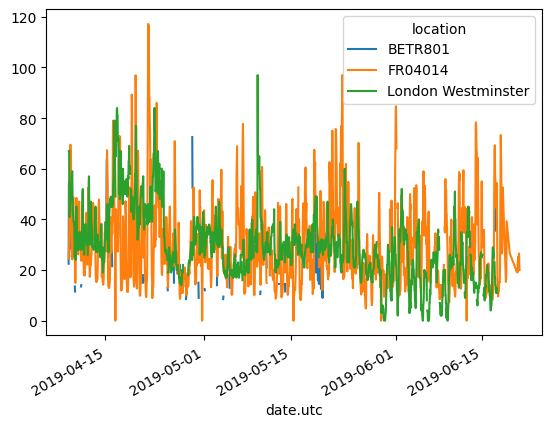

In [ ]:
  no2.pivot(columns="location", values="value").plot()

In [ ]:
air_quality_long.pivot_table(
    values="value", index="location", columns="parameter", aggfunc="mean"
)

parameter,no2,pm25
location,,
BETR801,26.950920,23.169492
FR04014,29.374284,NaN
London Westminster,29.740050,13.443568


**margins (subtotals) for each variable, set the margins parameter to True**

In [ ]:
air_quality_long.pivot_table(
    values="value",
    index="location",
    columns="parameter",
    aggfunc="mean",
    margins=True,
)

parameter,no2,pm25,All
location,,,
BETR801,26.950920,23.169492,24.982353
FR04014,29.374284,NaN,29.374284
London Westminster,29.740050,13.443568,21.491708
All,29.430316,14.386849,24.222743


In [ ]:
air_quality_long.groupby(["location","parameter"])[["value"]].mean()

value
location           parameter           
BETR801            no2        26.950920
                   pm25       23.169492
FR04014            no2        29.374284
London Westminster no2        29.740050
                   pm25       13.443568

In [ ]:
no2_pivoted = no2.pivot(columns="location", values="value").reset_index()
no2_pivoted

location,date.utc,BETR801,FR04014,London Westminster
0,2019-04-09 01:00:00+00:00,22.5,24.4,NaN
1,2019-04-09 02:00:00+00:00,53.5,27.4,67.0
2,2019-04-09 03:00:00+00:00,54.5,34.2,67.0
3,2019-04-09 04:00:00+00:00,34.5,48.5,41.0
4,2019-04-09 05:00:00+00:00,46.5,59.5,41.0
...,...,...,...,...
1700,2019-06-20 20:00:00+00:00,NaN,21.4,NaN
1701,2019-06-20 21:00:00+00:00,NaN,24.9,NaN
1702,2019-06-20 22:00:00+00:00,NaN,26.5,NaN
1703,2019-06-20 23:00:00+00:00,NaN,21.8,NaN


In [ ]:
no2_single = no2.pivot(columns=["location","value"])
no2_single

**pandas.melt() method on a DataFrame converts the data table from wide format to long format. The column headers become the variable names in a newly created column.**

In [ ]:
no_2 = no2_pivoted.melt(id_vars="date.utc")
no_2

,date.utc,location,value
0,2019-04-09 01:00:00+00:00,BETR801,22.5
1,2019-04-09 02:00:00+00:00,BETR801,53.5
2,2019-04-09 03:00:00+00:00,BETR801,54.5
3,2019-04-09 04:00:00+00:00,BETR801,34.5
4,2019-04-09 05:00:00+00:00,BETR801,46.5
...,...,...,...
5110,2019-06-20 20:00:00+00:00,London Westminster,NaN
5111,2019-06-20 21:00:00+00:00,London Westminster,NaN
5112,2019-06-20 22:00:00+00:00,London Westminster,NaN
5113,2019-06-20 23:00:00+00:00,London Westminster,NaN


In [ ]:
no_2 = no2_pivoted.melt(
    id_vars="date.utc",
    value_vars=["BETR801", "FR04014", "London Westminster"],
    value_name="NO_2",
    var_name="id_location",
)
no_2

,date.utc,id_location,NO_2
0,2019-04-09 01:00:00+00:00,BETR801,22.5
1,2019-04-09 02:00:00+00:00,BETR801,53.5
2,2019-04-09 03:00:00+00:00,BETR801,54.5
3,2019-04-09 04:00:00+00:00,BETR801,34.5
4,2019-04-09 05:00:00+00:00,BETR801,46.5
...,...,...,...
5110,2019-06-20 20:00:00+00:00,London Westminster,NaN
5111,2019-06-20 21:00:00+00:00,London Westminster,NaN
5112,2019-06-20 22:00:00+00:00,London Westminster,NaN
5113,2019-06-20 23:00:00+00:00,London Westminster,NaN


# **combine data from multiple tables**

In [ ]:
import pandas as pd

In [ ]:
air_quality_no2 = pd.read_csv("/content/drive/MyDrive/data_practices/pandas/data/air_quality_no2_long.csv",parse_dates=True)
air_quality_no2 = air_quality_no2[["date.utc","location", "parameter", "value"]]
air_quality_no2.head()

,date.utc,location,parameter,value
0,2019-06-21 00:00:00+00:00,FR04014,no2,20.0
1,2019-06-20 23:00:00+00:00,FR04014,no2,21.8
2,2019-06-20 22:00:00+00:00,FR04014,no2,26.5
3,2019-06-20 21:00:00+00:00,FR04014,no2,24.9
4,2019-06-20 20:00:00+00:00,FR04014,no2,21.4


In [ ]:
air_quality_pm25 = pd.read_csv("/content/drive/MyDrive/data_practices/pandas/data/air_quality_pm25_long.csv", parse_dates =True)
air_quality_pm25 = air_quality_pm25[["date.utc", "location","parameter", "value"]]
air_quality_pm25.head()

,date.utc,location,parameter,value
0,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0
1,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5
2,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5
3,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0
4,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5


**The concat() function performs concatenation operations of multiple tables along one of the axes (row-wise or column-wise)**

In [ ]:
air_quality = pd.concat([air_quality_pm25, air_quality_no2], axis=0)
air_quality

,date.utc,location,parameter,value
0,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0
1,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5
2,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5
3,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0
4,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5
...,...,...,...,...
2063,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0
2064,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0
2065,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0
2066,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0


In [ ]:
print('Shape of the ``air_quality_pm25`` table: ', air_quality_pm25.shape)

print('Shape of the ``air_quality_no2`` table: ', air_quality_no2.shape)

print('Shape of the resulting ``air_quality`` table: ', air_quality.shape)

Shape of the ``air_quality_pm25`` table:  (1110, 4)
Shape of the ``air_quality_no2`` table:  (2068, 4)
Shape of the resulting ``air_quality`` table:  (3178, 4)


In [ ]:
air_quality = air_quality.sort_values("date.utc")
air_quality

,date.utc,location,parameter,value
2067,2019-05-07 01:00:00+00:00,London Westminster,no2,23.0
1003,2019-05-07 01:00:00+00:00,FR04014,no2,25.0
100,2019-05-07 01:00:00+00:00,BETR801,pm25,12.5
1098,2019-05-07 01:00:00+00:00,BETR801,no2,50.5
1109,2019-05-07 01:00:00+00:00,London Westminster,pm25,8.0
...,...,...,...,...
2,2019-06-20 22:00:00+00:00,FR04014,no2,26.5
102,2019-06-20 23:00:00+00:00,London Westminster,pm25,7.0
1,2019-06-20 23:00:00+00:00,FR04014,no2,21.8
101,2019-06-21 00:00:00+00:00,London Westminster,pm25,7.0


In [ ]:
air_quality.reset_index(level=0)

,index,date.utc,location,parameter,value
0,2067,2019-05-07 01:00:00+00:00,London Westminster,no2,23.0
1,1003,2019-05-07 01:00:00+00:00,FR04014,no2,25.0
2,100,2019-05-07 01:00:00+00:00,BETR801,pm25,12.5
3,1098,2019-05-07 01:00:00+00:00,BETR801,no2,50.5
4,1109,2019-05-07 01:00:00+00:00,London Westminster,pm25,8.0
...,...,...,...,...,...
3173,2,2019-06-20 22:00:00+00:00,FR04014,no2,26.5
3174,102,2019-06-20 23:00:00+00:00,London Westminster,pm25,7.0
3175,1,2019-06-20 23:00:00+00:00,FR04014,no2,21.8
3176,101,2019-06-21 00:00:00+00:00,London Westminster,pm25,7.0


In [ ]:
air_quality_ = pd.concat([air_quality_pm25, air_quality_no2], keys=["PM25", "NO2"])
air_quality_

date.utc            location parameter  value
PM25 0     2019-06-18 06:00:00+00:00             BETR801      pm25   18.0
     1     2019-06-17 08:00:00+00:00             BETR801      pm25    6.5
     2     2019-06-17 07:00:00+00:00             BETR801      pm25   18.5
     3     2019-06-17 06:00:00+00:00             BETR801      pm25   16.0
     4     2019-06-17 05:00:00+00:00             BETR801      pm25    7.5
...                              ...                 ...       ...    ...
NO2  2063  2019-05-07 06:00:00+00:00  London Westminster       no2   26.0
     2064  2019-05-07 04:00:00+00:00  London Westminster       no2   16.0
     2065  2019-05-07 03:00:00+00:00  London Westminster       no2   19.0
     2066  2019-05-07 02:00:00+00:00  London Westminster       no2   19.0
     2067  2019-05-07 01:00:00+00:00  London Westminster       no2   23.0

[3178 rows x 4 columns]

In [ ]:
merged_data = pd.merge(air_quality_no2, air_quality_pm25, left_on=['location', 'parameter'], right_on=['location', 'parameter'])
merged_data

,date.utc_x,location,parameter,value_x,date.utc_y,value_y


# **Handle time series data**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
air_quality = pd.read_csv("/content/drive/MyDrive/data_practices/pandas/data/air_quality_no2_long.csv")
air_quality = air_quality.rename(columns={"date.utc":"datetime"})
air_quality.head()

,city,country,datetime,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


**.unique() is use to showcase number of unique items present in the column**

In [6]:
print("locations: ",air_quality.location.unique())
print("cities: ",air_quality.city.unique())

locations:  ['FR04014' 'BETR801' 'London Westminster']
cities:  ['Paris' 'Antwerpen' 'London']


**By applying the to_datetime function, pandas interprets the strings and convert these to datetime (i.e. datetime64[ns, UTC]) objects**

In [7]:
air_quality["datetime"] = pd.to_datetime(air_quality["datetime"])
air_quality["datetime"]

0      2019-06-21 00:00:00+00:00
1      2019-06-20 23:00:00+00:00
2      2019-06-20 22:00:00+00:00
3      2019-06-20 21:00:00+00:00
4      2019-06-20 20:00:00+00:00
                  ...           
2063   2019-05-07 06:00:00+00:00
2064   2019-05-07 04:00:00+00:00
2065   2019-05-07 03:00:00+00:00
2066   2019-05-07 02:00:00+00:00
2067   2019-05-07 01:00:00+00:00
Name: datetime, Length: 2068, dtype: datetime64[ns, UTC]

*2nd approach to convert dates:

```
# pd.read_csv("air_quality_no2_long.csv", parse_dates=["datetime"])
```

**start and end date of data**

In [8]:
air_quality["datetime"].min(), air_quality["datetime"].max()

(Timestamp('2019-05-07 01:00:00+0000', tz='UTC'),
 Timestamp('2019-06-21 00:00:00+0000', tz='UTC'))

**Using pandas.Timestamp for datetimes enables us to calculate with date information and make them comparable**

In [9]:
air_quality["datetime"].max() - air_quality["datetime"].min()

Timedelta('44 days 23:00:00')

In [10]:
air_quality["month"] = air_quality["datetime"].dt.month
air_quality.head()

,city,country,datetime,location,parameter,value,unit,month
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,6
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,6
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,6
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,6
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,6


In [21]:
air_quality.groupby([air_quality["datetime"].dt.weekday, "location"])["value"].mean()

datetime  location          
0         BETR801               27.875000
          FR04014               24.856250
          London Westminster    23.969697
1         BETR801               22.214286
          FR04014               30.999359
          London Westminster    24.885714
2         BETR801               21.125000
          FR04014               29.165753
          London Westminster    23.460432
3         BETR801               27.500000
          FR04014               28.600690
          London Westminster    24.780142
4         BETR801               28.400000
          FR04014               31.617986
          London Westminster    26.446809
5         BETR801               33.500000
          FR04014               25.266154
          London Westminster    24.977612
6         BETR801               21.896552
          FR04014               23.274306
          London Westminster    24.859155
Name: value, dtype: float64

In [16]:
air_quality["datetime"].dt.weekday
air_quality

,city,country,datetime,location,parameter,value,unit,month
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,6
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,6
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,6
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,6
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,6
...,...,...,...,...,...,...,...,...
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³,5
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³,5
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³,5
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³,5


Text(0, 0.5, '$NO_2 (µg/m^3)$')

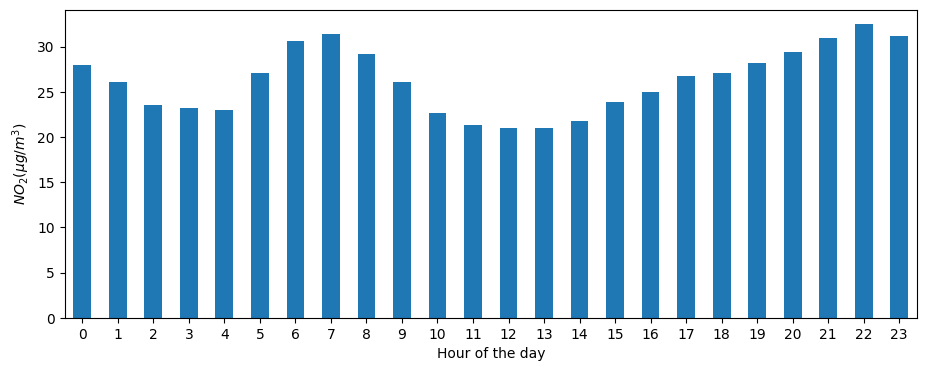

In [41]:
fig, axs = plt.subplots(figsize=(11, 4))
air_quality.groupby(air_quality["datetime"].dt.hour)["value"].mean().plot(
    kind='bar',rot=0, ax=axs
)
plt.xlabel("Hour of the day") # custom x label using Matplotlib
plt.ylabel("$NO_2 (µg/m^3)$")


**Datetime as index**

In [42]:
no_2  = air_quality.pivot(index="datetime", columns="location", values="value")
no_2.head()

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-07 01:00:00+00:00,50.5,25.0,23.0
2019-05-07 02:00:00+00:00,45.0,27.7,19.0
2019-05-07 03:00:00+00:00,NaN,50.4,19.0
2019-05-07 04:00:00+00:00,NaN,61.9,16.0
2019-05-07 05:00:00+00:00,NaN,72.4,NaN


In [43]:
no_2.index.year , no_2.index.weekday

(Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
        ...
        2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
       dtype='int32', name='datetime', length=1033),
 Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        ...
        3, 3, 3, 3, 3, 3, 3, 3, 3, 4],
       dtype='int32', name='datetime', length=1033))

<Axes: xlabel='datetime'>

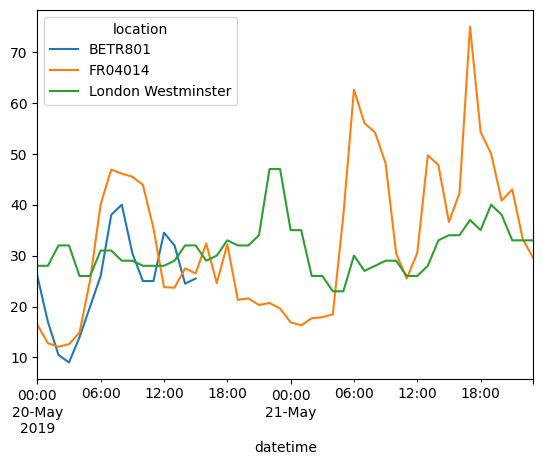

In [44]:
no_2["2019-05-20":"2019-05-21"].plot()

**Aggregate the current hourly time series values to the weekly maximum value in each of the stations**

In [54]:
weekly_max = no_2.resample("W").max()
weekly_max

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-12 00:00:00+00:00,50.5,77.7,97.0
2019-05-19 00:00:00+00:00,41.5,67.5,49.0
2019-05-26 00:00:00+00:00,74.5,97.0,60.0
2019-06-02 00:00:00+00:00,52.5,84.7,52.0
2019-06-09 00:00:00+00:00,15.0,59.0,40.0
2019-06-16 00:00:00+00:00,42.5,78.3,51.0
2019-06-23 00:00:00+00:00,45.0,73.3,17.0


*The resample() method is similar to a groupby operation:

it provides a time-based grouping, by using a string (e.g. M, 5H,…) that defines the target frequency

it requires an aggregation function such as mean, max*

In [53]:
monthly_mean = no_2.resample("M").mean()
monthly_mean

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-31 00:00:00+00:00,24.344156,27.908446,28.158433
2019-06-30 00:00:00+00:00,31.916667,27.499272,19.581152


**The frequency of the time series is provided by the freq attribute:**

In [55]:
weekly_max.index.freq

<Week: weekday=6>

In [56]:
monthly_mean.index.freq

<MonthEnd>

**Make a plot of the daily mean NO2 value in each of the station**

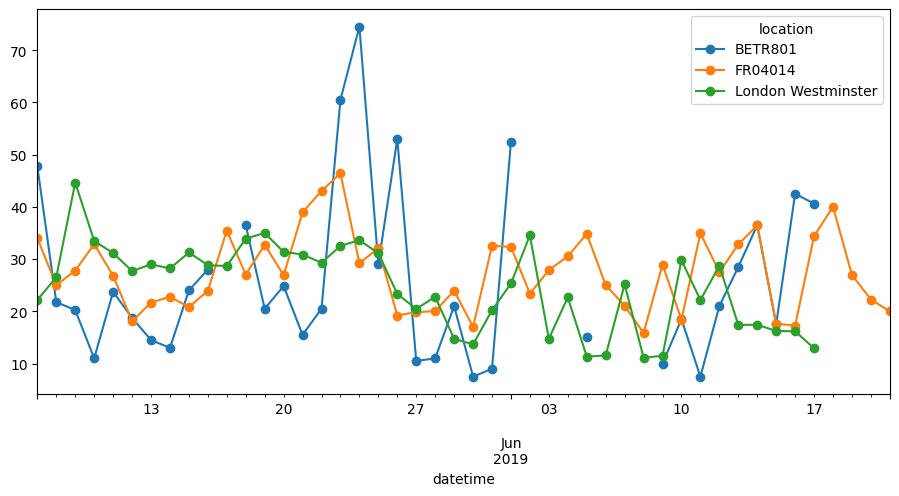

In [74]:
no_2.resample("D").mean().plot(style="-o", figsize=(11, 5));

**plotted max value per day**

<Axes: xlabel='datetime'>

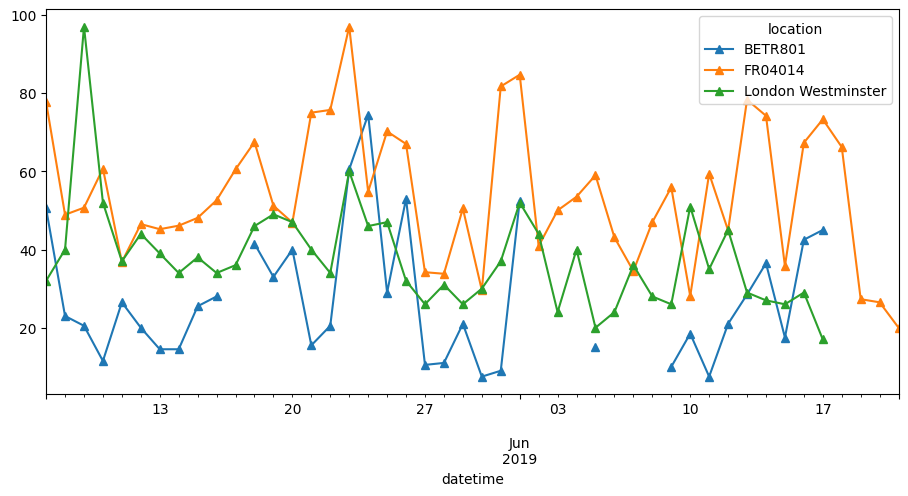

In [76]:
no_2.resample("D").max().plot(style="-^",figsize=(11,5))

<Axes: xlabel='datetime'>

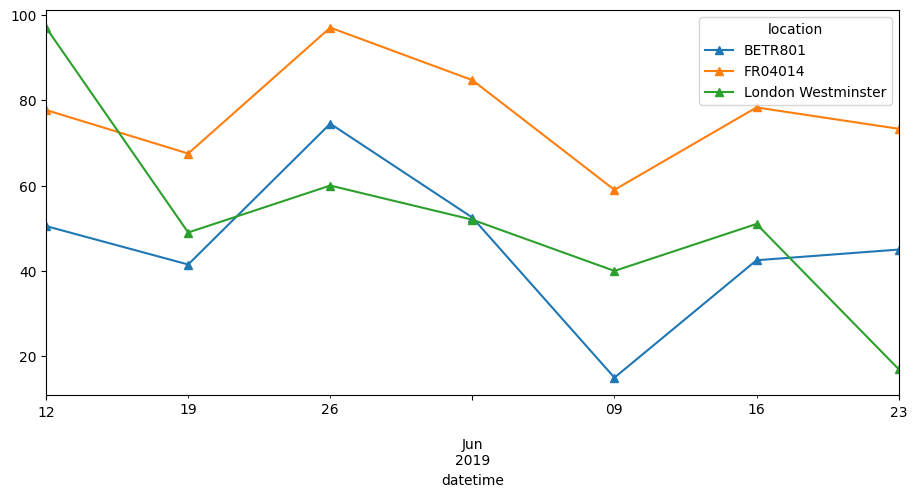

In [79]:
no_2.resample("W").max().plot(style="-^",figsize=(11,5))

# **Manipulate textual data**

In [80]:
import pandas as pd

In [82]:
titanic = pd.read_csv("/content/drive/MyDrive/data_practices/pandas/data/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Make all name characters lowercase.**

**add the str accessor **

In [84]:
titanic["Name"].str.lower()

0                                braund, mr. owen harris
1      cumings, mrs. john bradley (florence briggs th...
2                                 heikkinen, miss. laina
3           futrelle, mrs. jacques heath (lily may peel)
4                               allen, mr. william henry
                             ...                        
886                                montvila, rev. juozas
887                         graham, miss. margaret edith
888             johnston, miss. catherine helen "carrie"
889                                behr, mr. karl howell
890                                  dooley, mr. patrick
Name: Name, Length: 891, dtype: object

In [86]:
titanic["Name"].str.upper()

0                                BRAUND, MR. OWEN HARRIS
1      CUMINGS, MRS. JOHN BRADLEY (FLORENCE BRIGGS TH...
2                                 HEIKKINEN, MISS. LAINA
3           FUTRELLE, MRS. JACQUES HEATH (LILY MAY PEEL)
4                               ALLEN, MR. WILLIAM HENRY
                             ...                        
886                                MONTVILA, REV. JUOZAS
887                         GRAHAM, MISS. MARGARET EDITH
888             JOHNSTON, MISS. CATHERINE HELEN "CARRIE"
889                                BEHR, MR. KARL HOWELL
890                                  DOOLEY, MR. PATRICK
Name: Name, Length: 891, dtype: object

In [138]:
titanic["Surname"] = titanic["Name"].str.split(",")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Sex_shorts
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"[Braund, Mr. Owen Harris]",M
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"[Cumings, Mrs. John Bradley (Florence Briggs ...",F
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"[Heikkinen, Miss. Laina]",F
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"[Futrelle, Mrs. Jacques Heath (Lily May Peel)]",F
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"[Allen, Mr. William Henry]",M


In [90]:
titanic["Surname"]

0                             [Braund,  Mr. Owen Harris]
1      [Cumings,  Mrs. John Bradley (Florence Briggs ...
2                              [Heikkinen,  Miss. Laina]
3        [Futrelle,  Mrs. Jacques Heath (Lily May Peel)]
4                            [Allen,  Mr. William Henry]
                             ...                        
886                             [Montvila,  Rev. Juozas]
887                      [Graham,  Miss. Margaret Edith]
888          [Johnston,  Miss. Catherine Helen "Carrie"]
889                             [Behr,  Mr. Karl Howell]
890                               [Dooley,  Mr. Patrick]
Name: Surname, Length: 891, dtype: object

** Series.str.get() to extract the relevant part**

In [94]:
titanic["Surname"] = titanic["Name"].str.split(",").str.get(0)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen


**Series.str.contains() checks for each of the values in the column Name if the string contains the word Countess and returns for each of the values True**

In [95]:
titanic[titanic["Name"].str.contains("Countess")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,B77,S,Rothes


In [98]:
titanic[titanic["Name"].str.contains("Mrs")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Johnson
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Nasser
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S,Hewlett
...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,Beckwith
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C,Abelson
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,Potter
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S,Shelley


In [106]:
titanic["Surname"].value_counts()

Surname
Andersson    9
Sage         7
Panula       6
Skoog        6
Carter       6
            ..
Hanna        1
Lewy         1
Mineff       1
Haas         1
Dooley       1
Name: count, Length: 667, dtype: int64

In [107]:
titanic[titanic["Surname"].str.contains("Andersson")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S,Andersson
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S,Andersson
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S,Andersson
146,147,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S,Andersson
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.2750,NaN,S,Andersson
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.2750,NaN,S,Andersson
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,S,Andersson
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S,Andersson
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S,Andersson


**passenger of the Titanic has the longest name?**

The idxmax() method does exactly that. It is not a string method and is applied to integers

In [127]:
print("id:",titanic["Name"].str.len().idxmax())
print("max len:",titanic["Name"].str.len().max())
print("name:",titanic.loc[307, 'Name'])

id: 307
max len: 82
name: Penasco y Castellana, Mrs. Victor de Satode (Maria Josefa Perez de Soto y Vallejo)


In [126]:
titanic.loc[307, 'Name']

'Penasco y Castellana, Mrs. Victor de Satode (Maria Josefa Perez de Soto y Vallejo)'

In [133]:
passenger_308_name = titanic.loc[titanic['PassengerId'] == 308, 'Name'].values[0]
passenger_308_name

'Penasco y Castellana, Mrs. Victor de Satode (Maria Josefa Perez de Soto y Vallejo)'

In [135]:
titanic.loc[titanic["Name"].str.len().idxmax(), "Name"]

'Penasco y Castellana, Mrs. Victor de Satode (Maria Josefa Perez de Soto y Vallejo)'

In [136]:
titanic["Sex_shorts"]= titanic["Sex"].replace({"male":"M","female":"F"})
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Sex_shorts
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,M
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,F
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,F
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,F
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,M


In [137]:
titanic["Sex"].str.replace("female", "F")

0      male
1         F
2         F
3         F
4      male
       ... 
886    male
887       F
888       F
889    male
890    male
Name: Sex, Length: 891, dtype: object